In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [21]:
base = "house-prices-advanced-regression-techniques/"

In [22]:
train = base + "train.csv"

In [23]:
trainDf = pd.read_csv(train)
trainDf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
trainDf.shape

(1460, 81)

In [25]:
test = base + "test.csv"
testDf = pd.read_csv(test)
testDf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [26]:
testDf.shape

(1459, 80)

In [27]:
trainDf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [28]:
features = ["LotArea", "BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF", "2ndFlrSF","LowQualFinSF","WoodDeckSF","OpenPorchSF","GarageArea", "GrLivArea"]

In [29]:
len(features)

12

In [30]:
trainDf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [31]:
trainDf[features]

,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,WoodDeckSF,OpenPorchSF,GarageArea,GrLivArea
0,8450,706,0,150,856,856,854,0,0,61,548,1710
1,9600,978,0,284,1262,1262,0,0,298,0,460,1262
2,11250,486,0,434,920,920,866,0,0,42,608,1786
3,9550,216,0,540,756,961,756,0,0,35,642,1717
4,14260,655,0,490,1145,1145,1053,0,192,84,836,2198
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,0,0,953,953,953,694,0,0,40,460,1647
1456,13175,790,163,589,1542,2073,0,0,349,0,500,2073
1457,9042,275,0,877,1152,1188,1152,0,0,60,252,2340
1458,9717,49,1029,0,1078,1078,0,0,366,0,240,1078


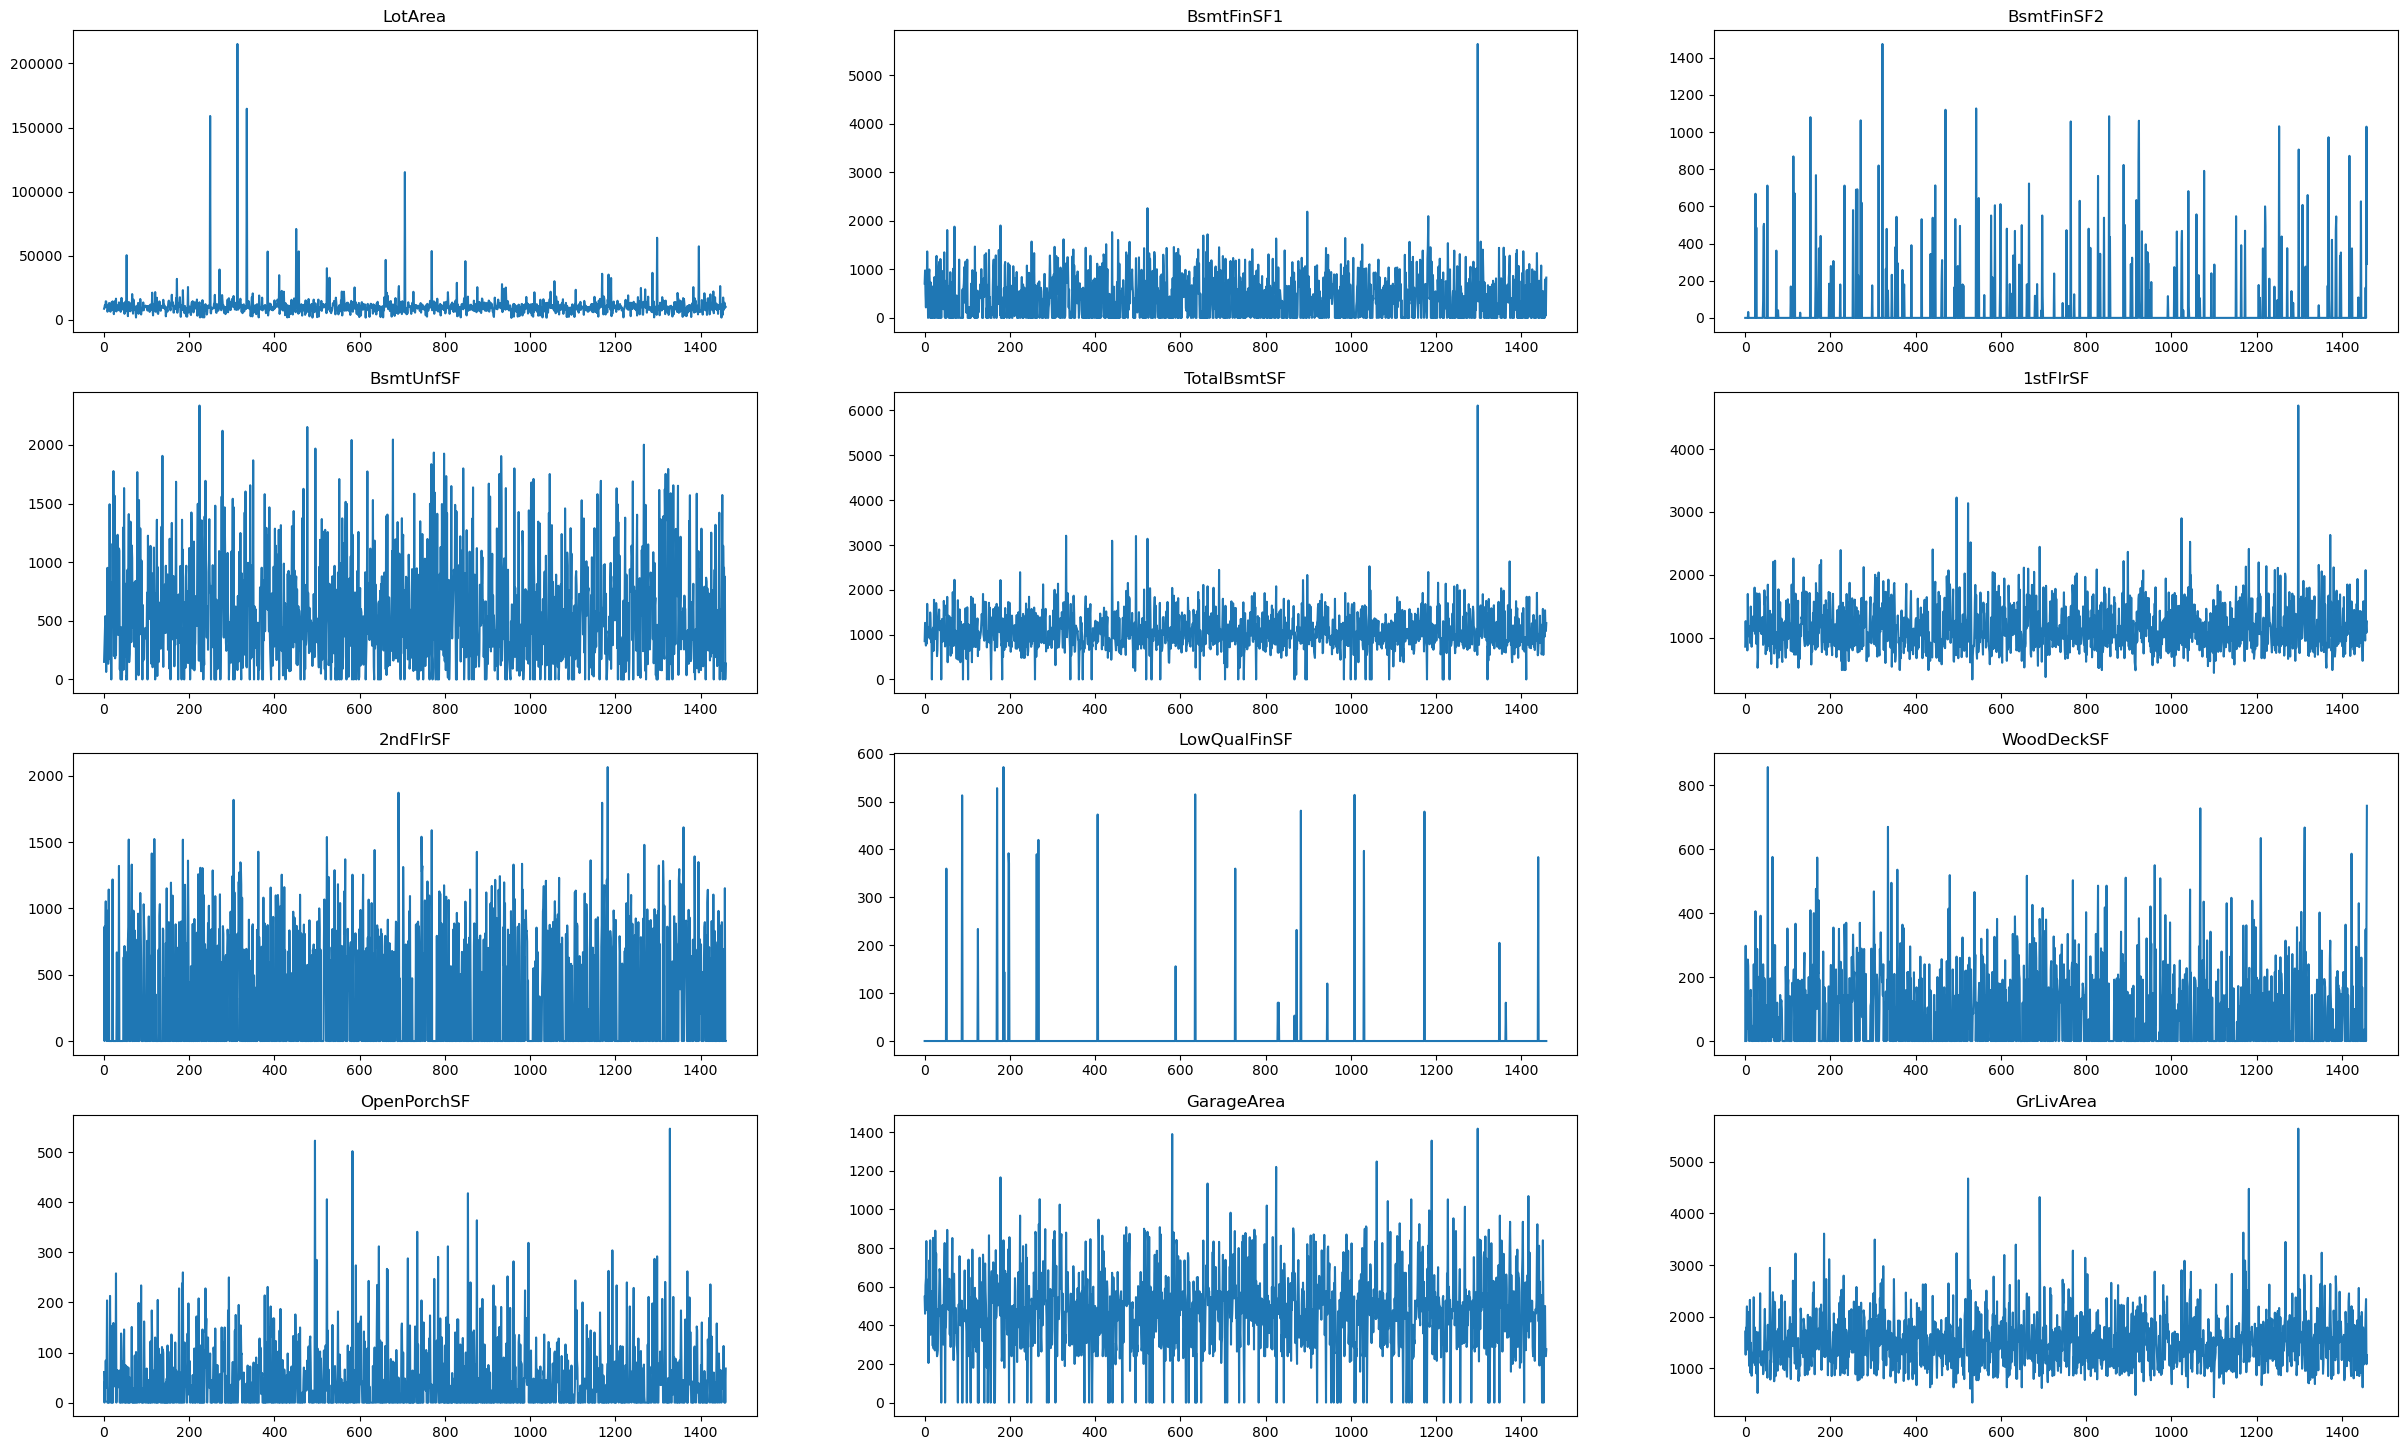

In [32]:
fig,ax = plt.subplots(4,3, figsize = (30,18))
cnt = 0
for i in range(4) :
    for j in range(3) :
        ax[i,j].plot(trainDf[features[cnt]])
        ax[i,j].set_title(features[cnt])
        cnt += 1
        continue 
        

In [33]:
features2 = ["BsmtFullBath", "BsmtHalfBath", "FullBath", "BedroomAbvGr", "TotRmsAbvGrd"]
trainDf[features2]

,BsmtFullBath,BsmtHalfBath,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,1,0,2,3,8
1,0,1,2,3,6
2,1,0,2,3,6
3,1,0,1,3,7
4,1,0,2,4,9
...,...,...,...,...,...
1455,0,0,2,3,7
1456,1,0,2,3,7
1457,0,0,2,4,9
1458,1,0,1,2,5


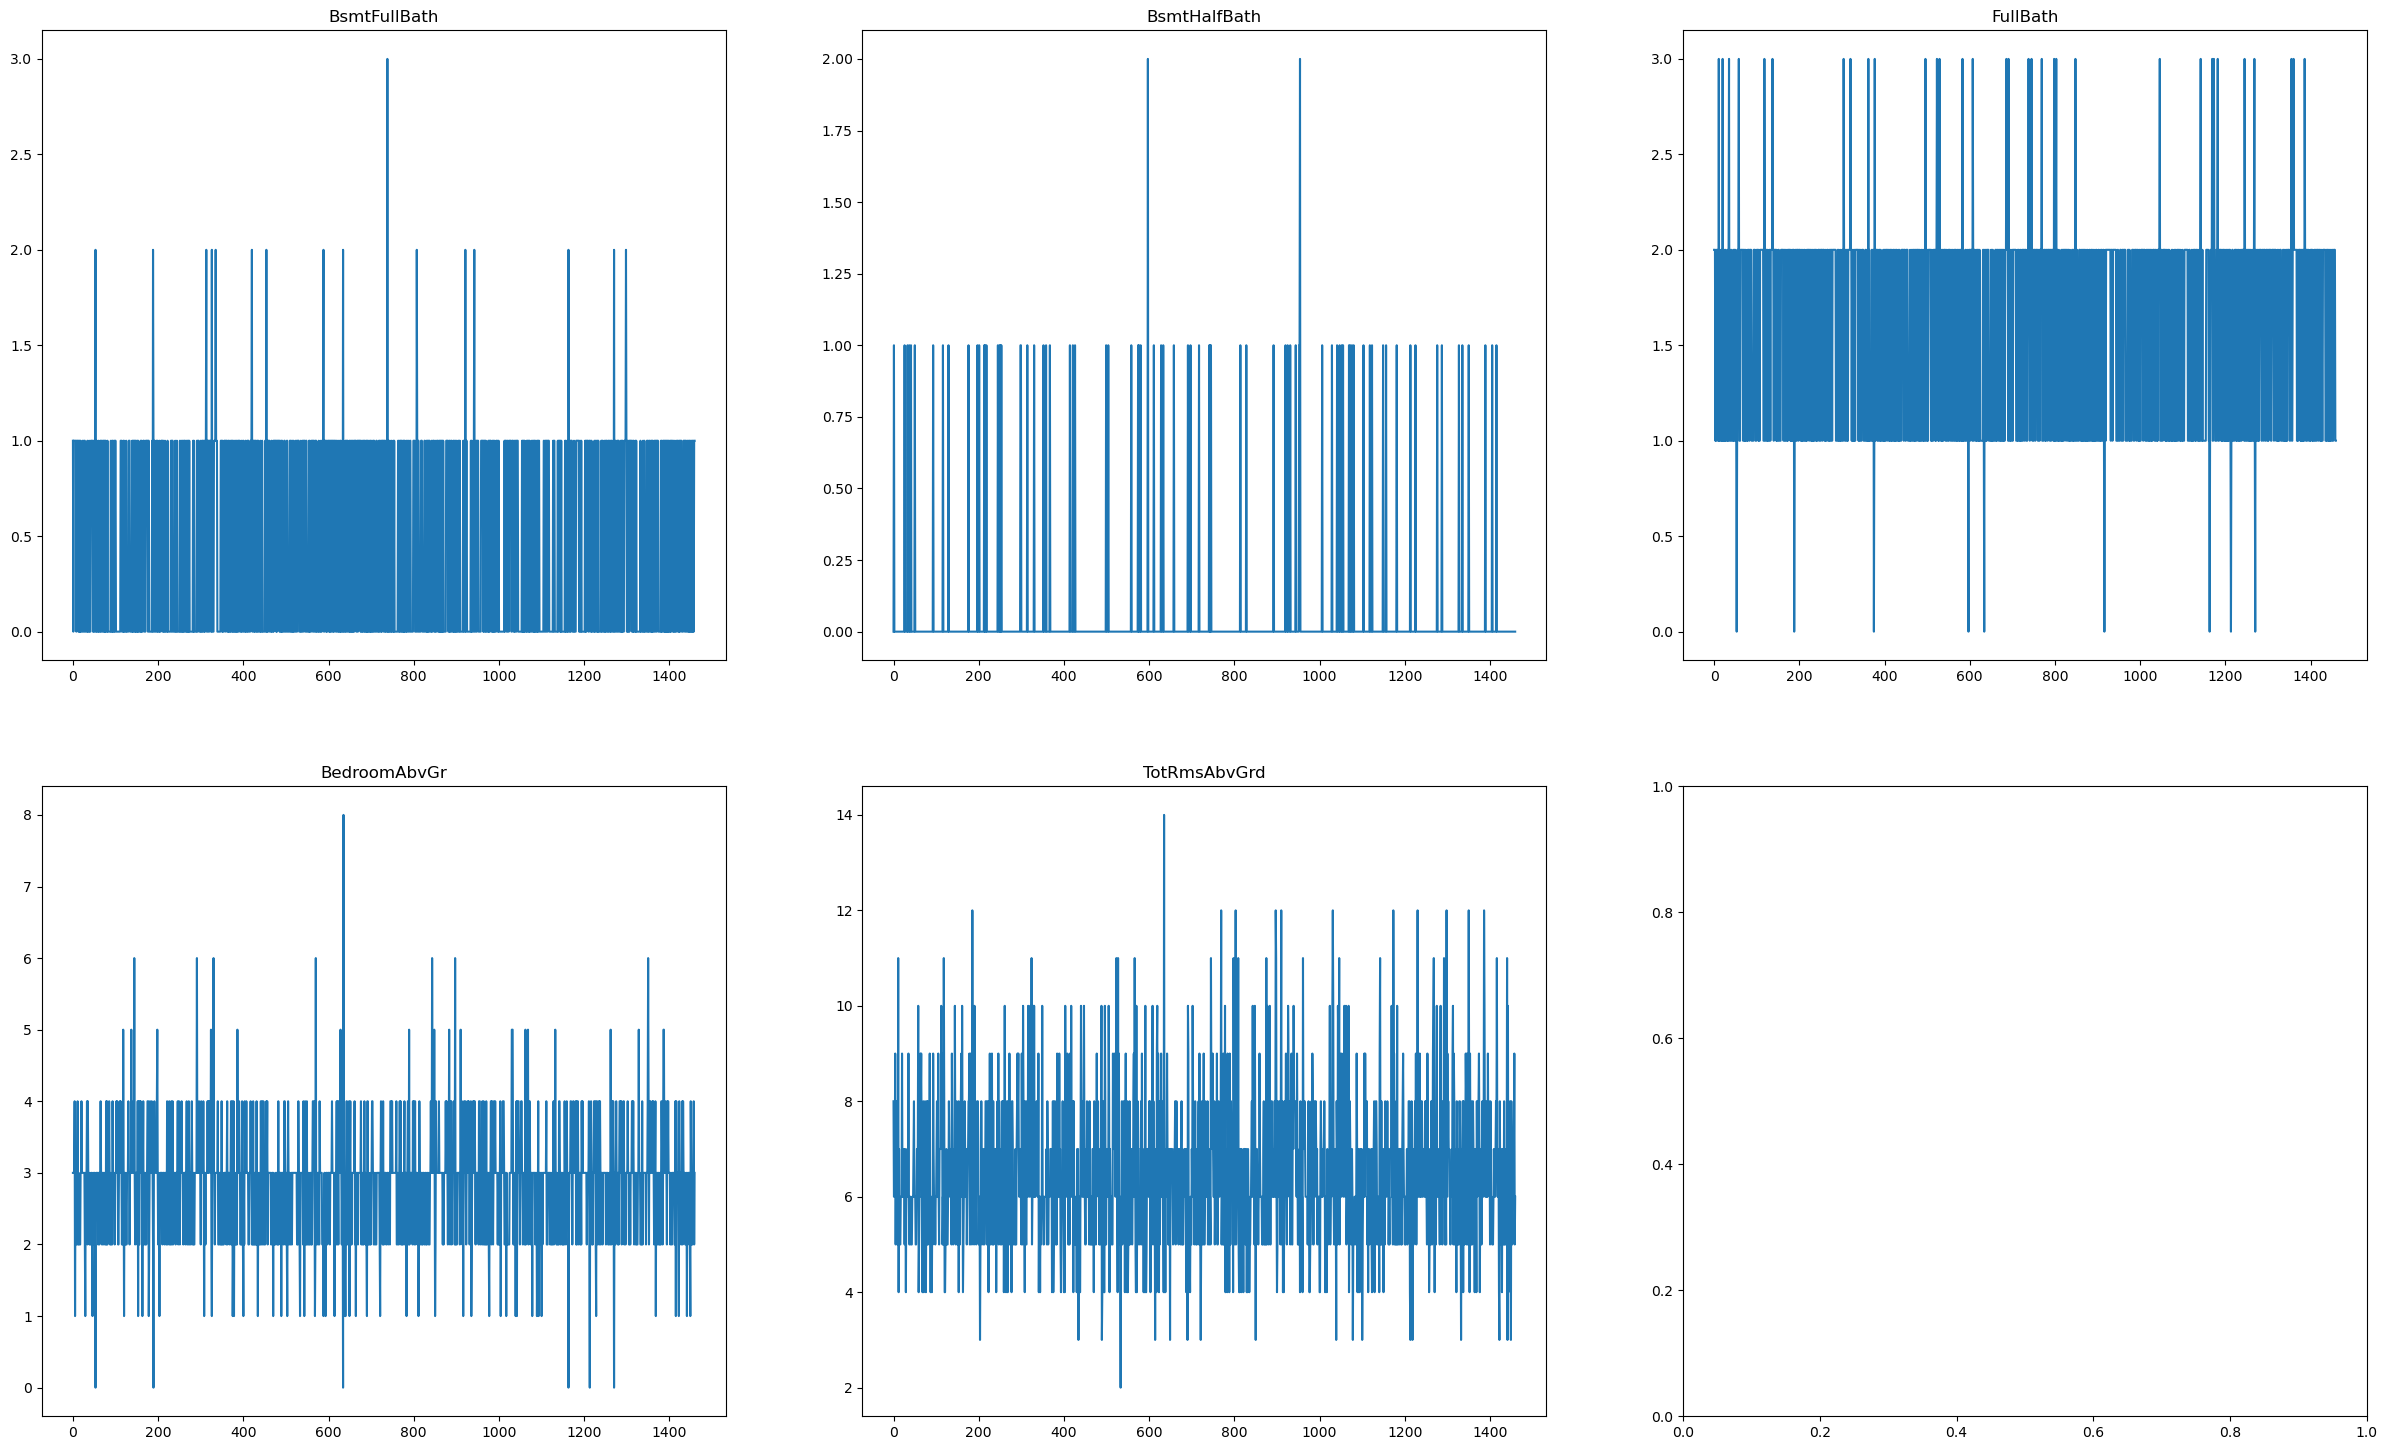

In [34]:
fig,ax = plt.subplots(2,3, figsize = (30,18))
cnt = 0
for i in range(2) :
    for j in range(3) :
        if cnt < len(features2):
            ax[i,j].plot(trainDf[features2[cnt]])
            ax[i,j].set_title(features2[cnt])
            cnt += 1
            continue 

In [35]:
feature = features + features2
trainDf[feature]

,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,WoodDeckSF,OpenPorchSF,GarageArea,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,706,0,150,856,856,854,0,0,61,548,1710,1,0,2,3,8
1,9600,978,0,284,1262,1262,0,0,298,0,460,1262,0,1,2,3,6
2,11250,486,0,434,920,920,866,0,0,42,608,1786,1,0,2,3,6
3,9550,216,0,540,756,961,756,0,0,35,642,1717,1,0,1,3,7
4,14260,655,0,490,1145,1145,1053,0,192,84,836,2198,1,0,2,4,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,0,0,953,953,953,694,0,0,40,460,1647,0,0,2,3,7
1456,13175,790,163,589,1542,2073,0,0,349,0,500,2073,1,0,2,3,7
1457,9042,275,0,877,1152,1188,1152,0,0,60,252,2340,0,0,2,4,9
1458,9717,49,1029,0,1078,1078,0,0,366,0,240,1078,1,0,1,2,5


In [36]:
trainDf[feature].isna().sum()

LotArea         0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
WoodDeckSF      0
OpenPorchSF     0
GarageArea      0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
xtrain, xtest ,ytrain, ytest = train_test_split(trainDf[feature],trainDf["SalePrice"],train_size= 0.85, random_state=12)


In [57]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
model = regression.fit(xtrain, ytrain)

In [58]:
y_pred = model.predict(xtest)

In [59]:
from sklearn.metrics import r2_score
score = r2_score(ytest, y_pred)
score

0.646645911159886

In [71]:
test = pd.read_csv(base +"test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [72]:
test[feature].isna().sum()

LotArea         0
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
WoodDeckSF      0
OpenPorchSF     0
GarageArea      1
GrLivArea       0
BsmtFullBath    2
BsmtHalfBath    2
FullBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
dtype: int64

In [82]:
testDF = test[feature]

In [83]:
testDF.isna().sum()

LotArea         0
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
WoodDeckSF      0
OpenPorchSF     0
GarageArea      1
GrLivArea       0
BsmtFullBath    2
BsmtHalfBath    2
FullBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
dtype: int64

In [84]:
testDF.dropna(axis=0, inplace=True)
testDF


/var/folders/31/89q4lfy92jx4lp6kwytq6lmw0000gn/T/ipykernel_23264/1235260863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testDF.dropna(axis=0, inplace=True)


,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,WoodDeckSF,OpenPorchSF,GarageArea,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,11622,468.0,144.0,270.0,882.0,896,0,0,140,0,730.0,896,0.0,0.0,1,2,5
1,14267,923.0,0.0,406.0,1329.0,1329,0,0,393,36,312.0,1329,0.0,0.0,1,3,6
2,13830,791.0,0.0,137.0,928.0,928,701,0,212,34,482.0,1629,0.0,0.0,2,3,6
3,9978,602.0,0.0,324.0,926.0,926,678,0,360,36,470.0,1604,0.0,0.0,2,3,7
4,5005,263.0,0.0,1017.0,1280.0,1280,0,0,0,82,506.0,1280,0.0,0.0,2,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,0.0,0.0,546.0,546.0,546,546,0,0,0,0.0,1092,0.0,0.0,1,3,5
1455,1894,252.0,0.0,294.0,546.0,546,546,0,0,24,286.0,1092,0.0,0.0,1,3,6
1456,20000,1224.0,0.0,0.0,1224.0,1224,0,0,474,0,576.0,1224,1.0,0.0,1,4,7
1457,10441,337.0,0.0,575.0,912.0,970,0,0,80,32,0.0,970,0.0,1.0,1,3,6


In [85]:
testDF.isna().sum()

LotArea         0
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
WoodDeckSF      0
OpenPorchSF     0
GarageArea      0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
BedroomAbvGr    0
TotRmsAbvGrd    0
dtype: int64

In [86]:
test_pred = model.predict(testDF)